In [1]:
import sys
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
path = sys.path[0]

In [3]:
def get_atom_type_number(file):
    with open(file, 'r') as fd:
        lines = fd.readlines()
    atom_type_number = {}
    for line in lines:
        if 'atom' in line:
            if len(line.split()) != 5:
                break
            atom_type = line.split()[-1]
            if atom_type in atom_type_number:
                atom_type_number[atom_type] += 1
            else:
                atom_type_number[atom_type] = 1
    return atom_type_number

In [4]:
def load_dos(file, min=-4., max=4.0, offset=0.0):
    data = pd.read_csv(file, delimiter= '\s+', header=None, skiprows=4, names=names )
#     print(data)
    data = data.dropna(axis=1)
    data['Energy [eV]'] +=offset
    data = data[(data['Energy [eV]']>min) & (data['Energy [eV]'] < max)]
    return data

In [5]:
def plot_dos(data, ax=None, y_lim=None, figsize=(10, 2.5)):
    if ax is None:
        fig, ax = plt.subplots(1, figsize=figsize)
    for col_name in data.columns[1:]:
        ax.plot(data['Energy [eV]'], data[col_name], label=col_name)
    ax.axvline(0.0, c='black', ymin=0, ls='--')
    ax.set_xticks(np.arange(-5, 5.1, 1.0), minor=True)
    ax.set_xlim(np.around(data['Energy [eV]'].min()), np.around(data['Energy [eV]'].max()))
    if y_lim is not None:
        ax.set_ylim(y_lim)
    ax.tick_params(axis="both",direction="in", which='both', length=4.0)
    ax.tick_params(axis="both",direction="in", which='major', length=5.0, width=1.0)
    
#     ax.tick_params(axis="x",direction="in")
    leg = ax.legend()

In [6]:
def generate_normalized_dos(dos_total, dos_Mo, dos_S, atom_type_number, dos_O=None, dos_H=None):
    normalized_dos_total = dos_total.copy()
    df = normalized_dos_total
    df['Total Mo - normalized'] = dos_Mo['Total']/(atom_type_number['Mo']*42)
    df['Total S - normalized'] = dos_S['Total']/(atom_type_number['S']*16)
    if dos_O is not None:
        df['Total O - normalized'] = dos_O['Total']/(atom_type_number['O']*8)
    # df['Total - normalized'] = df['Total Mo - normalized'] + df['Total S - normalized'] + df['Total O - normalized']
    if dos_H is not None:
        df['Total H - normalized'] = dos_H['Total']/(atom_type_number['H']*1)
    normalized_dos_total.drop('Total', inplace=True, axis=1)
    plot_dos(normalized_dos_total, figsize=(7, 2.5))  # y_lim=[-0.002, 0.06],
    plt.xlabel('Enegy [eV]', fontsize=15)
    plt.ylabel('DOS', fontsize=15)
    return normalized_dos_total

# 1-Mo48S96 - Model (i)

In [7]:
path_1_Mo48S96 = '{:}/1-Mo48S96'.format(path)

In [8]:
n_atom_type_1_Mo48S96 = get_atom_type_number('{:}/geometry.in'.format(path_1_Mo48S96))
n_atom_type_1_Mo48S96

{'Mo': 48, 'S': 96}

In [9]:
names = ['Energy [eV]', 'Total'] + ['l={:}'.format(i) for i in range(10)]
# dos_1 = np.loadtxt(dos_path)
# dos_1 = pd.read_table(dos_path)

### DOS 

In [10]:
offset = 0.00

#### DOS total - Mo48S96

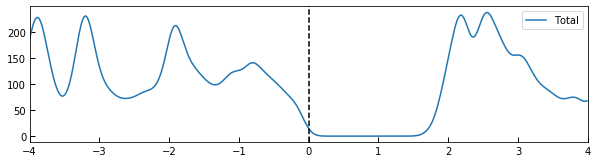

In [11]:
# Electron configuration	[Kr] 4d5 5s1
file = 'KS_DOS_total.dat'
file = '{:}/{:}'.format(path_1_Mo48S96, file)
dos_total_1_Mo48S96 = load_dos(file, offset=offset)
plot_dos(dos_total_1_Mo48S96)
# plt.xlim([-15, 15])

#### DOS Mo projection - Mo48S96

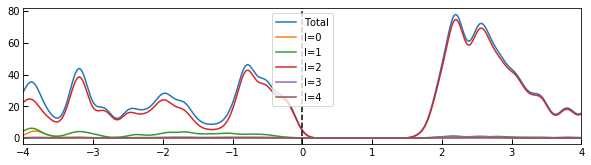

In [12]:
# Electron configuration	[Kr] 4d5 5s1
file = 'Mo_l_proj_dos.dat'
file = '{:}/{:}'.format(path_1_Mo48S96, file)
dos_Mo_1_Mo48S96 = load_dos(file, offset=offset)
plot_dos(dos_Mo_1_Mo48S96)

#### DOS S projection - Mo48S96

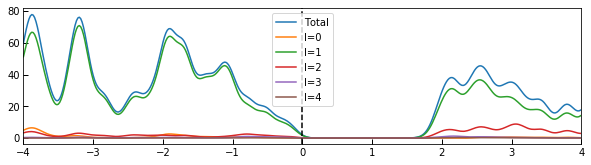

In [13]:
# Electron configuration	[Ne] 3s2 3p4
file = 'S_l_proj_dos.dat'
file = '{:}/{:}'.format(path_1_Mo48S96, file)
dos_S_1_Mo48S96 = load_dos(file, offset=offset)
plot_dos(dos_S_1_Mo48S96)

#### DOS M and S projection and Total - Mo48S96

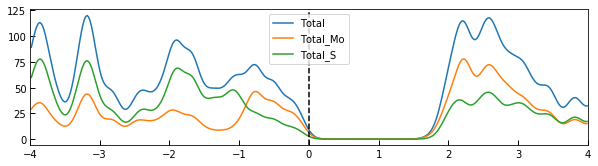

In [14]:
dos_total_Mo_S = dos_total_1_Mo48S96.copy()
dos_total_Mo_S['Total_Mo'] = dos_Mo_1_Mo48S96['Total']
dos_total_Mo_S['Total_S'] = dos_S_1_Mo48S96['Total']
dos_total_Mo_S['Total'] = (dos_total_Mo_S['Total_Mo'] + dos_total_Mo_S['Total_S'])
# dos_total_Mo_S.drop('Total', inplace=True, axis=1)
plot_dos(dos_total_Mo_S)

### DOS normalized by number of atoms and electrons

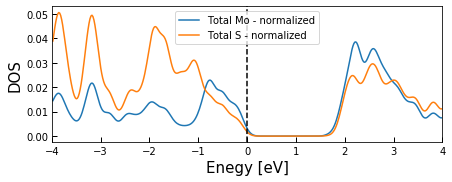

In [15]:
normalized_dos_total_1_Mo48S96 = generate_normalized_dos(
    dos_total=dos_total_1_Mo48S96, dos_Mo=dos_Mo_1_Mo48S96, dos_O=None
    , dos_S=dos_S_1_Mo48S96, atom_type_number=n_atom_type_1_Mo48S96
)

 ***
# 2-Mo48S95O - Model (ii)

### DOS

In [16]:
offset = 0.0

In [17]:
path_2_Mo48S95O = '{:}/2-Mo48S95O'.format(path)
path_2_Mo48S95O

'/media/tiago/tiagobotari/data/MoS2_DFT/MoS2_oxygen/2-Mo48S95O'

In [18]:
n_atom_type_2_Mo48S95O = get_atom_type_number('{:}/geometry.in'.format(path_2_Mo48S95O))
n_atom_type_2_Mo48S95O

{'Mo': 48, 'S': 95, 'O': 1}

#### DOS total - Mo48S95O

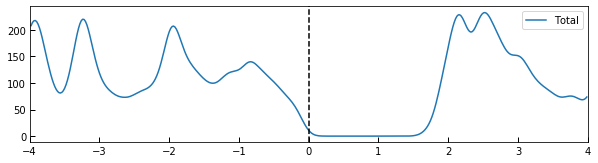

In [19]:
# Electron configuration	[Kr] 4d5 5s1
file = 'KS_DOS_total.dat'
file = '{:}/{:}'.format(path_2_Mo48S95O, file)
dos_total_2_Mo48S95O = load_dos(file, offset=offset)
plot_dos(dos_total_2_Mo48S95O)

#### DOS Mo projection - Mo48S95O

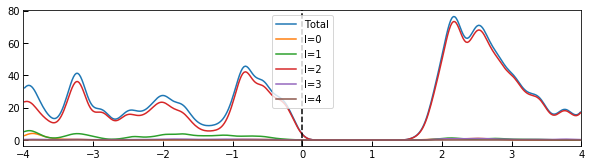

In [20]:
# Electron configuration	[Kr] 4d5 5s1
file = 'Mo_l_proj_dos.dat'
file = '{:}/{:}'.format(path_2_Mo48S95O, file)
dos_Mo_2_Mo48S95O = load_dos(file, offset=offset)
plot_dos(dos_Mo_2_Mo48S95O)

#### DOS S projection - Mo48S95O

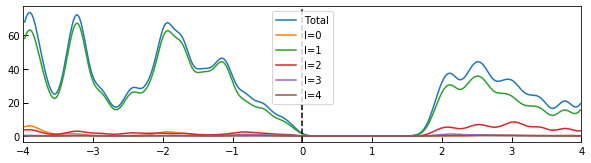

In [21]:
# Electron configuration	[Kr] 4d5 5s1
file = 'S_l_proj_dos.dat'
file = '{:}/{:}'.format(path_2_Mo48S95O, file)
dos_S_2_Mo48S95O = load_dos(file, offset=offset)
plot_dos(dos_S_2_Mo48S95O)

#### DOS O projection - Mo48S95O

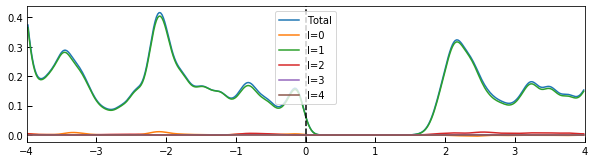

In [22]:
#Electron configuration	[He] 2s2 2p4
file = 'O_l_proj_dos.dat'
file = '{:}/{:}'.format(path_2_Mo48S95O, file)
dos_O_2_Mo48S95O = load_dos(file, offset=offset)
plot_dos(dos_O_2_Mo48S95O)

### DOS normalized by number of atoms and electrons

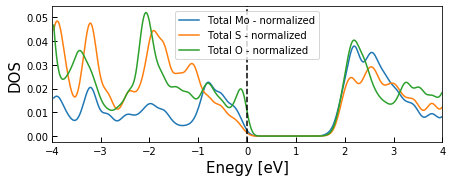

In [23]:
normalized_dos_total_2_Mo48S95O = generate_normalized_dos(
    dos_total=dos_total_2_Mo48S95O, dos_Mo=dos_Mo_2_Mo48S95O, dos_O=dos_O_2_Mo48S95O
    , dos_S=dos_S_2_Mo48S95O, atom_type_number=n_atom_type_2_Mo48S95O
)

 ***
# 3-Mo48S96O - Model (iii)

### DOS

In [24]:
offset = 1.6
# offset = 0

In [25]:
path_3_Mo48S96O = '{:}/3-Mo48S96O'.format(path)
path_3_Mo48S96O

'/media/tiago/tiagobotari/data/MoS2_DFT/MoS2_oxygen/3-Mo48S96O'

In [26]:
n_atom_type_3_Mo48S96O = get_atom_type_number('{:}/geometry.in'.format(path_3_Mo48S96O))
n_atom_type_3_Mo48S96O

{'Mo': 48, 'S': 96, 'O': 1}

#### DOS total - Mo48S96O

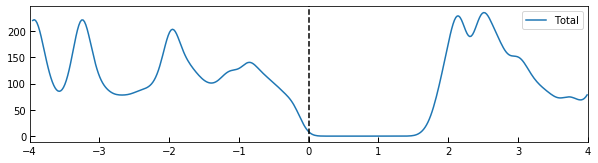

In [27]:
# Electron configuration	[Kr] 4d5 5s1
file = 'KS_DOS_total.dat'
file = '{:}/{:}'.format(path_3_Mo48S96O, file)
dos_total_3_Mo48S96O = load_dos(file, offset=offset)
plot_dos(dos_total_3_Mo48S96O)

#### DOS Mo projection - Mo48S96O

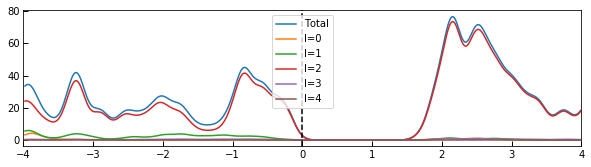

In [28]:
# Electron configuration	[Kr] 4d5 5s1
file = 'Mo_l_proj_dos.dat'
file = '{:}/{:}'.format(path_3_Mo48S96O, file)
dos_Mo_3_Mo48S96O = load_dos(file, offset=offset)
plot_dos(dos_Mo_3_Mo48S96O)

#### DOS S projection - Mo48S96O

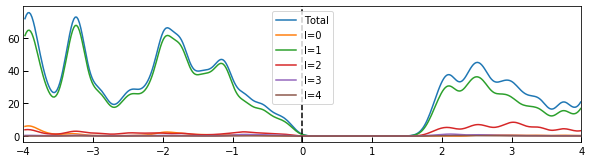

In [29]:
# Electron configuration	[Kr] 4d5 5s1
file = 'S_l_proj_dos.dat'
file = '{:}/{:}'.format(path_3_Mo48S96O, file)
dos_S_3_Mo48S96O = load_dos(file, offset=offset)
plot_dos(dos_S_3_Mo48S96O)

#### DOS O projection - Mo48S96O

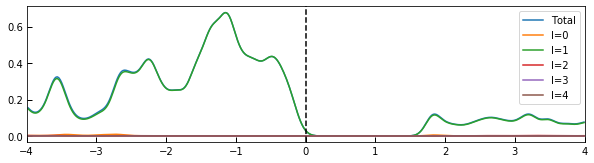

In [30]:
#Electron configuration	[He] 2s2 2p4
file = 'O_l_proj_dos.dat'
file = '{:}/{:}'.format(path_3_Mo48S96O, file)
dos_O_3_Mo48S96O = load_dos(file, offset=offset,  min=-20., max=4.0)
plot_dos(dos_O_3_Mo48S96O)

### DOS normalized by number of atoms and electrons

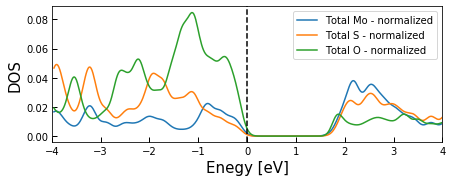

In [31]:
normalized_dos_total_3_Mo48S96O = generate_normalized_dos(
    dos_total=dos_total_3_Mo48S96O, dos_Mo=dos_Mo_3_Mo48S96O, dos_O=dos_O_3_Mo48S96O
    , dos_S=dos_S_3_Mo48S96O, atom_type_number=n_atom_type_3_Mo48S96O
)

***
# All Normalized DOS

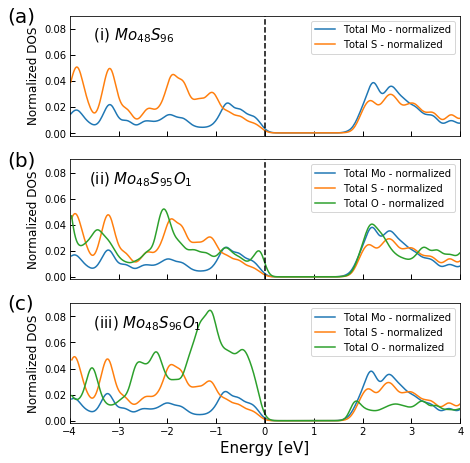

In [33]:

import string
fig, axis = plt.subplots(3, 1, figsize=(7, 7.5), sharex=True)
axis = axis.flatten()
plot_dos(normalized_dos_total_1_Mo48S96, y_lim=[-0.002, 0.09], figsize=(7, 2.5), ax=axis[0])
plot_dos(normalized_dos_total_2_Mo48S95O, y_lim=[-0.002, 0.09], figsize=(7, 2.5), ax=axis[1])
plot_dos(normalized_dos_total_3_Mo48S96O, y_lim=[-0.002, 0.09], figsize=(7, 2.5), ax=axis[2])


plt.xlabel('Energy [eV]', fontsize=15)
label_1 = ''.join(['{:}_{{{:}}}'.format(e, ee) for e, ee in n_atom_type_1_Mo48S96.items()])
label_2 = ''.join(['{:}_{{{:}}}'.format(e, ee) for e, ee in n_atom_type_2_Mo48S95O.items()])
label_3 = ''.join(['{:}_{{{:}}}'.format(e, ee) for e, ee in n_atom_type_3_Mo48S96O.items()])
materials = [' (i) ${:}$'.format(label_1), '(ii) ${:}$'.format(label_2), ' (iii) ${:}$'.format(label_3)]
for n, ax in enumerate(axis):
    ax.text(-0.16, 0.95,'({:})'.format(string.ascii_lowercase[n]), transform=ax.transAxes, 
            size=20) #, weight='bold')
    ax.text(0.05, 0.800,'{:}'.format(materials[n]), transform=ax.transAxes, 
            size=15) #, weight='bold')
    ax.set_ylabel('Normalized DOS', fontsize=12)
plt.savefig('dos_normilized.png')